<a href="https://colab.research.google.com/github/iam-abbas/GRIT/blob/models/Curation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pymysql

     |████████████████████████████████| 51kB 1.6MB/s 


In [2]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
db = pymysql.connect("projectbit.cyhengy6zww6.us-west-2.rds.amazonaws.com","root","projectbit","bit-db" )
cur = db.cursor()

In [0]:
cur.execute("SELECT * FROM `bit-response`")
query = cur.fetchall()

In [5]:
df = pd.DataFrame(query)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
93,94,Lisa,lgrotte@gmail.com,None,None,2,7318,2,9255,3,5905,2,7509,3,7974,2,5037,3,4562,2,5462,3,4550,5,9534,1,6382,2,5947,3,7239,1,7994,3,10386,5,16451,4,13534,4,...,2,7228,2,5623,2,6559,3,5922,3,5015,2,6301,3,7992,1,6329,2,24867,2,5137,4,5425,2,10032,1,8191,1,15392,3,6003,4,4945,3,5621,2,24915,5,2,1,1
94,95,Piero,piero.molino@gmail.com,None,None,5,12044,5,4658,1,6897,2,11854,2,8215,2,20956,4,5510,2,13410,5,5076,5,4191,1,6196,2,14191,4,12890,1,5826,5,4126,5,3306,5,6878,5,...,2,9445,2,9706,5,7348,4,6329,2,8732,1,6547,2,8682,2,9117,2,7950,1,7244,5,6664,1,7347,1,5245,1,9700,4,13536,5,9848,3,4952,2,8265,3,5,2,1
95,96,Chetan,chetankandpal3@gmail.com,None,None,2,7136,2,13045,3,5069,1,7162,3,3745,2,7056,5,6301,4,4247,5,4526,5,6287,3,5839,5,4232,1,11559,2,6109,3,3809,2,3763,4,6498,5,...,2,4970,3,5313,5,6451,2,6492,5,3713,3,7463,5,11980,2,7167,1,3298,1,9649,3,5135,2,5963,2,5400,3,8575,2,12709,3,3793,5,2748,4,4655,1,3,2,4
96,97,Raghav Gupta,raghav0296@gmail.com,None,None,4,22773,4,14880,1,16682,1,16165,5,8914,1,18382,4,6709,3,36246,5,5763,5,6769,1,9596,2,20812,4,11867,2,17194,4,12979,5,4989,1,23118,5,...,2,8690,1,8671,4,14278,4,8085,2,8513,1,46601,5,14796,2,70465,2,7058,1,10677,5,16865,1,6031,2,15075,1,8538,4,18215,4,9403,5,4671,1,9867,1,4,2,4
97,98,Priyansh Batra,woozworld8123@gmail.com,None,None,4,10043,5,10250,4,6436,3,19718,2,6663,2,6889,4,19069,3,7220,4,7089,5,6474,4,10729,4,9105,4,9920,2,24091,3,7042,4,5841,3,7047,4,...,2,6051,3,9333,2,11221,3,6975,4,4202,3,11601,4,13454,2,8259,4,5201,3,19585,2,14554,1,6843,2,7837,2,9287,4,7324,4,10171,4,6144,2,11445,3,2,2,4


In [6]:
cur.execute("SHOW columns FROM `bit-response`")
query = cur.fetchall()
cols = [x[0] for x in query]
cols[5:10]

['Q1-Ans', 'Q1-Time', 'Q2-Ans', 'Q2-Time', 'Q3-Ans']

In [7]:
df.columns = cols
df.set_index('id')
df.head(10)

,id,name,email,info-1,info-2,Q1-Ans,Q1-Time,Q2-Ans,Q2-Time,Q3-Ans,Q3-Time,Q4-Ans,Q4-Time,Q5-Ans,Q5-Time,Q6-Ans,Q6-Time,Q7-Ans,Q7-Time,Q8-Ans,Q8-Time,Q9-Ans,Q9-Time,Q10-Ans,Q10-Time,Q11-Ans,Q11-Time,Q12-Ans,Q12-Time,Q13-Ans,Q13-Time,Q14-Ans,Q14-Time,Q15-Ans,Q15-Time,Q16-Ans,Q16-Time,Q17-Ans,Q17-Time,Q18-Ans,...,Q21-Ans,Q21-Time,Q22-Ans,Q22-Time,Q23-Ans,Q23-Time,Q24-Ans,Q24-Time,Q25-Ans,Q25-Time,Q26-Ans,Q26-Time,Q27-Ans,Q27-Time,Q28-Ans,Q28-Time,Q29-Ans,Q29-Time,Q30-Ans,Q30-Time,Q31-Ans,Q31-Time,Q32-Ans,Q32-Time,Q33-Ans,Q33-Time,Q34-Ans,Q34-Time,Q35-Ans,Q35-Time,Q36-Ans,Q36-Time,Q37-Ans,Q37-Time,Q38-Ans,Q38-Time,Demo1,Demo2,Demo3,Demo4
0,1,Abbas,,None,None,3,1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
1,2,Abbas,abbas_mj@berkeley.edu,None,None,3,2115,4,1923,2,2031,3,2101,4,2338,4,3439,4,1800,2,2819,3,1724,4,2061,3,2062,3,2079,4,2013,4,3239,5,3161,1,2157,5,1918,3,...,2,2175,5,2222,5,1690,1,1883,5,2538,3,1974,3,1680,5,1758,3,1627,4,1718,5,1789,2,1788,4,1611,1,2285,2,1800,1,2001,1,1809,4,2216,3,2,2,4
2,3,Abbas,iamabbas7@gmail.com,None,None,3,7327,3,1673,3,1948,3,3233,3,1917,3,3149,3,3584,3,3186,3,2482,3,2260,3,5313,3,2428,3,2444,3,2297,3,2856,3,3746,3,5309,3,...,3,2268,3,2169,3,4028,3,3507,3,2756,3,3385,3,2267,3,2129,3,2163,3,2359,3,2260,3,1785,3,2353,3,2551,3,2277,3,2299,3,1887,3,2354,3,3,3,3
3,4,Abbas Mohammed,iamabbas7@gmail.com,None,None,3,1933,3,1561,3,1485,3,1545,3,1762,3,1718,3,1681,3,1652,3,2061,3,1654,3,1767,3,1586,3,3339,3,2963,3,1610,3,1759,3,1638,3,...,3,1600,3,1583,3,1585,3,1615,3,1630,3,1572,3,1619,3,1683,3,1554,3,1597,3,1540,3,1539,3,1561,3,1515,3,2070,3,1651,3,1517,3,1570,3,3,3,3
4,5,Abbas Md,abbas_mj@berkeley.edu,None,None,3,2466,3,1610,3,1838,3,1721,3,1778,3,1731,3,1875,3,1724,3,1944,3,1715,3,1769,3,1662,3,1745,3,1723,3,1716,3,1884,3,1724,3,...,3,1629,3,1739,3,1746,3,1654,3,1745,3,1723,3,1837,3,1801,3,3366,3,1717,3,2289,3,1729,3,1739,3,1844,3,1638,3,1883,3,1670,3,1724,3,3,3,3
5,6,Abbas MJ,iamabbas@gmail.com,None,None,4,3935,4,1702,4,1572,4,1604,4,1522,4,1603,4,1506,4,1727,4,1477,4,1618,4,1552,4,1937,4,1732,4,1600,4,1592,4,1462,4,1483,4,...,4,1559,4,1596,4,1660,4,1572,4,1453,4,1577,4,1557,4,1520,4,1590,4,1536,4,1604,4,1924,4,1540,4,1612,4,1548,4,1433,4,1521,4,1629,4,4,4,4
6,7,,,None,None,3,2335,3,1499,3,1553,3,1586,3,1592,3,1459,3,1707,3,1648,3,1649,3,1719,3,1803,3,1725,3,2814,3,1456,3,2502,3,2231,3,3048,3,...,3,1804,3,5170,3,9008,3,2767,3,2031,3,1721,3,1614,3,1826,3,1798,3,1303,3,1525,3,1572,3,1630,3,1682,3,1643,3,1687,3,2989,3,1545,3,3,3,3
7,8,,,None,None,3,2038,5,1791,2,1670,4,1647,1,1813,3,1818,4,1700,2,1698,5,1914,1,3402,4,2916,1,2331,5,2496,1,1850,3,2306,4,3469,5,5242,1,...,5,3051,1,3304,1,8315,5,2550,2,2165,5,2791,1,2694,5,4419,1,4078,4,2461,2,2476,5,2799,1,2979,4,3373,1,2591,5,2257,2,2157,5,2634,5,4,3,3
8,9,Abbas j Mohammed,abbas_mj@berkeley.edu,None,None,5,23674,4,2136,3,5646,5,7882,4,5099,2,6767,3,5170,2,5291,5,6684,3,7119,2,13324,2,7230,4,27680,2,9178,4,7726,5,5367,3,8054,5,...,4,6908,3,5701,4,18297,4,4524,2,4226,1,5209,4,8708,2,9274,4,5293,4,6786,2,4620,3,8503,1,5638,4,7690,5,4700,5,5623,5,3442,2,3520,1,3,2,4
9,10,Rishvanth,rishvanth@berkeley.edu,None,None,3,26181,4,7921,1,12743,2,11505,4,6621,3,9329,5,7641,2,7732,5,5535,5,5095,3,6957,1,4612,2,11513,1,5236,5,4128,5,3524,1,8844,5,...,1,8299,2,4945,5,8201,3,6890,2,5394,1,8644,3,13798,5,6061,2,5492,1,5520,4,7848,1,7010,4,5944,5,9551,5,3363,5,5376,3,4671,2,4390,1,3,2,4


In [0]:
time_arr = [x for x in cols if "Time" in x]
ans_arr = [x for x in cols if "Ans" in x]

In [9]:
df = df.iloc[8:]
df.head()

,id,name,email,info-1,info-2,Q1-Ans,Q1-Time,Q2-Ans,Q2-Time,Q3-Ans,Q3-Time,Q4-Ans,Q4-Time,Q5-Ans,Q5-Time,Q6-Ans,Q6-Time,Q7-Ans,Q7-Time,Q8-Ans,Q8-Time,Q9-Ans,Q9-Time,Q10-Ans,Q10-Time,Q11-Ans,Q11-Time,Q12-Ans,Q12-Time,Q13-Ans,Q13-Time,Q14-Ans,Q14-Time,Q15-Ans,Q15-Time,Q16-Ans,Q16-Time,Q17-Ans,Q17-Time,Q18-Ans,...,Q21-Ans,Q21-Time,Q22-Ans,Q22-Time,Q23-Ans,Q23-Time,Q24-Ans,Q24-Time,Q25-Ans,Q25-Time,Q26-Ans,Q26-Time,Q27-Ans,Q27-Time,Q28-Ans,Q28-Time,Q29-Ans,Q29-Time,Q30-Ans,Q30-Time,Q31-Ans,Q31-Time,Q32-Ans,Q32-Time,Q33-Ans,Q33-Time,Q34-Ans,Q34-Time,Q35-Ans,Q35-Time,Q36-Ans,Q36-Time,Q37-Ans,Q37-Time,Q38-Ans,Q38-Time,Demo1,Demo2,Demo3,Demo4
8,9,Abbas j Mohammed,abbas_mj@berkeley.edu,None,None,5,23674,4,2136,3,5646,5,7882,4,5099,2,6767,3,5170,2,5291,5,6684,3,7119,2,13324,2,7230,4,27680,2,9178,4,7726,5,5367,3,8054,5,...,4,6908,3,5701,4,18297,4,4524,2,4226,1,5209,4,8708,2,9274,4,5293,4,6786,2,4620,3,8503,1,5638,4,7690,5,4700,5,5623,5,3442,2,3520,1,3,2,4
9,10,Rishvanth,rishvanth@berkeley.edu,None,None,3,26181,4,7921,1,12743,2,11505,4,6621,3,9329,5,7641,2,7732,5,5535,5,5095,3,6957,1,4612,2,11513,1,5236,5,4128,5,3524,1,8844,5,...,1,8299,2,4945,5,8201,3,6890,2,5394,1,8644,3,13798,5,6061,2,5492,1,5520,4,7848,1,7010,4,5944,5,9551,5,3363,5,5376,3,4671,2,4390,1,3,2,4
10,11,Teja,Padmatejaadusumalli@gmail.com,None,None,5,16057,2,5010,1,7885,2,3354,5,13791,1,9980,5,8485,1,5050,5,6729,5,8814,2,10551,1,6468,1,21744,2,15637,5,8806,5,5101,5,7166,5,...,2,8424,2,20195,5,7160,4,8552,5,7162,1,5698,5,5440,1,12123,1,12089,1,58190,5,5275,5,9387,5,7796,2,6748,5,10577,5,6036,5,6709,2,37636,3,3,1,4
11,12,Ashish Kumar,ashishvlt403@gmail.com,None,None,4,31391,2,15797,3,27941,2,17769,5,9871,4,7968,2,16364,3,9258,5,22559,5,9570,5,12564,4,8979,3,18922,4,50448,5,8827,5,7023,2,9331,2,...,2,15598,1,8175,3,16288,2,7452,1,8620,4,22496,2,54001,4,20488,5,24320,4,8486,5,15140,2,13270,4,10028,5,14523,5,9649,4,13985,3,28671,1,10722,4,3,2,4
12,13,Nilofer Mohammad,mneelu457@gmail.com,None,None,4,10176,4,8296,2,7469,2,8761,4,7001,3,7852,4,7363,2,5839,4,34510,3,6403,2,6375,3,5277,2,7543,1,8013,3,4745,4,5767,2,5134,4,...,2,6437,3,7120,1,6329,2,12037,1,4992,1,8618,4,15906,3,13854,1,6158,1,35472,5,8204,2,5992,3,5906,1,32713,5,5646,4,5827,3,5099,4,16709,1,3,1,4


In [0]:
df = df.drop_duplicates(inplace=False)

In [11]:
df.describe()

,id,Q1-Ans,Q1-Time,Q2-Ans,Q2-Time,Q3-Ans,Q3-Time,Q4-Ans,Q4-Time,Q5-Ans,Q5-Time,Q6-Ans,Q6-Time,Q7-Ans,Q7-Time,Q8-Ans,Q8-Time,Q9-Ans,Q9-Time,Q10-Ans,Q10-Time,Q11-Ans,Q11-Time,Q12-Ans,Q12-Time,Q13-Ans,Q13-Time,Q14-Ans,Q14-Time,Q15-Ans,Q15-Time,Q16-Ans,Q16-Time,Q17-Ans,Q17-Time,Q18-Ans,Q18-Time,Q19-Ans,Q19-Time,Q20-Ans,...,Q21-Ans,Q21-Time,Q22-Ans,Q22-Time,Q23-Ans,Q23-Time,Q24-Ans,Q24-Time,Q25-Ans,Q25-Time,Q26-Ans,Q26-Time,Q27-Ans,Q27-Time,Q28-Ans,Q28-Time,Q29-Ans,Q29-Time,Q30-Ans,Q30-Time,Q31-Ans,Q31-Time,Q32-Ans,Q32-Time,Q33-Ans,Q33-Time,Q34-Ans,Q34-Time,Q35-Ans,Q35-Time,Q36-Ans,Q36-Time,Q37-Ans,Q37-Time,Q38-Ans,Q38-Time,Demo1,Demo2,Demo3,Demo4
count,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,53.500000,3.977778,4.777688e+04,3.511111,11924.811111,2.466667,13271.955556,2.644444,14797.566667,3.333333,9766.888889,2.500000,14244.988889,3.800000,8422.544444,2.833333,17465.044444,4.188889,8760.644444,4.388889,9820.466667,2.777778,14466.322222,2.544444,9199.222222,3.222222,13209.144444,2.00000,16572.044444,3.955556,10137.422222,4.366667,4869.022222,3.233333,8477.700000,4.333333,8789.000000,2.722222,13339.955556,4.000000,...,2.633333,9918.000000,2.611111,8044.233333,3.500000,11306.111111,3.411111,8396.133333,2.722222,5943.022222,2.333333,9311.011111,3.233333,9403.577778,2.044444,13667.077778,2.122222,6714.000000,1.788889,13720.144444,3.988889,2.040048e+04,2.000000,13999.088889,2.588889,8440.655556,2.177778,13434.244444,3.70000,8332.500000,3.855556,8601.588889,3.477778,5.381936e+04,2.866667,9260.688889,1.933333,2.322222,1.688889,3.455556
std,26.124701,1.111511,2.242465e+05,1.229273,14659.843451,1.007834,20265.829171,1.202162,47395.812756,1.151452,11861.340717,1.019473,25075.481884,1.072642,7740.510148,1.104129,39116.014716,0.981794,8105.154494,0.908072,14974.210156,1.278849,45517.071288,1.237623,10149.193556,1.313523,10970.396341,1.08099,35456.302893,1.090419,26896.542562,1.054152,2198.983907,1.414611,5380.412932,0.911845,7309.842895,1.390399,38356.519284,1.151452,...,1.043439,8183.223035,1.269296,7318.296423,1.367767,22470.236751,1.058878,12317.596832,1.315660,3462.339662,1.236159,7018.916128,1.289979,6488.306673,1.090419,15875.736400,1.234593,6446.909396,1.096413,36583.877614,1.146509,1.152148e+05,0.994366,31753.503507,1.235200,7632.348248,1.176338,31933.479540,1.18464,7606.172984,1.204496,8286.014241,1.182530,4.374787e+05,1.143619,19302.434821,1.206723,0.957851,0.533052,1.018493
min,9.000000,1.000000,3.528000e+03,1.000000,1896.000000,1.000000,1615.000000,1.000000,1891.000000,1.000000,1396.000000,1.000000,1305.000000,1.000000,1360.000000,1.000000,1364.000000,1.000000,1305.000000,1.000000,2139.000000,1.000000,1571.000000,1.000000,1968.000000,1.000000,1486.000000,1.00000,1504.000000,1.000000,1561.000000,1.000000,1565.000000,1.000000,1534.000000,1.000000,1483.000000,1.000000,1402.000000,1.000000,...,1.000000,1469.000000,1.000000,1988.000000,1.000000,1319.000000,1.000000,1553.000000,1.000000,1484.000000,1.000000,1354.000000,1.000000,1411.000000,1.000000,1845.000000,1.000000,1563.000000,1.000000,1535.000000,1.000000,1.523000e+03,1.000000,1454.000000,1.000000,1445.000000,1.000000,1430.000000,1.00000,1424.000000,1.000000,1424.000000,1.000000,1.592000e+03,1.000000,1365.000000,1.000000,1

In [0]:
df_time = df.drop(columns=ans_arr)
df_ans = df.drop(columns=time_arr)

In [13]:
df_ans.head()

,id,name,email,info-1,info-2,Q1-Ans,Q2-Ans,Q3-Ans,Q4-Ans,Q5-Ans,Q6-Ans,Q7-Ans,Q8-Ans,Q9-Ans,Q10-Ans,Q11-Ans,Q12-Ans,Q13-Ans,Q14-Ans,Q15-Ans,Q16-Ans,Q17-Ans,Q18-Ans,Q19-Ans,Q20-Ans,Q21-Ans,Q22-Ans,Q23-Ans,Q24-Ans,Q25-Ans,Q26-Ans,Q27-Ans,Q28-Ans,Q29-Ans,Q30-Ans,Q31-Ans,Q32-Ans,Q33-Ans,Q34-Ans,Q35-Ans,Q36-Ans,Q37-Ans,Q38-Ans,Demo1,Demo2,Demo3,Demo4
8,9,Abbas j Mohammed,abbas_mj@berkeley.edu,None,None,5,4,3,5,4,2,3,2,5,3,2,2,4,2,4,5,3,5,3,4,4,3,4,4,2,1,4,2,4,4,2,3,1,4,5,5,5,2,1,3,2,4
9,10,Rishvanth,rishvanth@berkeley.edu,None,None,3,4,1,2,4,3,5,2,5,5,3,1,2,1,5,5,1,5,1,4,1,2,5,3,2,1,3,5,2,1,4,1,4,5,5,5,3,2,1,3,2,4
10,11,Teja,Padmatejaadusumalli@gmail.com,None,None,5,2,1,2,5,1,5,1,5,5,2,1,1,2,5,5,5,5,2,5,2,2,5,4,5,1,5,1,1,1,5,5,5,2,5,5,5,2,3,3,1,4
11,12,Ashish Kumar,ashishvlt403@gmail.com,None,None,4,2,3,2,5,4,2,3,5,5,5,4,3,4,5,5,2,2,1,5,2,1,3,2,1,4,2,4,5,4,5,2,4,5,5,4,3,1,4,3,2,4
12,13,Nilofer Mohammad,mneelu457@gmail.com,None,None,4,4,2,2,4,3,4,2,4,3,2,3,2,1,3,4,2,4,2,3,2,3,1,2,1,1,4,3,1,1,5,2,3,1,5,4,3,4,1,3,1,4


,id,Q1-Ans,Q2-Ans,Q3-Ans,Q4-Ans,Q5-Ans,Q6-Ans,Q7-Ans,Q8-Ans,Q9-Ans,Q10-Ans,Q11-Ans,Q12-Ans,Q13-Ans,Q14-Ans,Q15-Ans,Q16-Ans,Q17-Ans,Q18-Ans,Q19-Ans,Q20-Ans,Q21-Ans,Q22-Ans,Q23-Ans,Q24-Ans,Q25-Ans,Q26-Ans,Q27-Ans,Q28-Ans,Q29-Ans,Q30-Ans,Q31-Ans,Q32-Ans,Q33-Ans,Q34-Ans,Q35-Ans,Q36-Ans,Q37-Ans,Q38-Ans,Demo1,Demo2,Demo3,Demo4
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,53.500000,3.977778,3.511111,2.466667,2.644444,3.333333,2.500000,3.800000,2.833333,4.188889,4.388889,2.777778,2.544444,3.222222,2.00000,3.955556,4.366667,3.233333,4.333333,2.722222,4.000000,2.633333,2.611111,3.500000,3.411111,2.722222,2.333333,3.233333,2.044444,2.122222,1.788889,3.988889,2.000000,2.588889,2.177778,3.70000,3.855556,3.477778,2.866667,1.933333,2.322222,1.688889,3.455556
std,26.124701,1.111511,1.229273,1.007834,1.202162,1.151452,1.019473,1.072642,1.104129,0.981794,0.908072,1.278849,1.237623,1.313523,1.08099,1.090419,1.054152,1.414611,0.911845,1.390399,1.151452,1.043439,1.269296,1.367767,1.058878,1.315660,1.236159,1.289979,1.090419,1.234593,1.096413,1.146509,0.994366,1.235200,1.176338,1.18464,1.204496,1.182530,1.143619,1.206723,0.957851,0.533052,1.018493
min,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.250000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.00000,3.000000,4.000000,2.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,3.000000
50%,53.500000,4.000000,4.000000,2.000000,2.000000,3.500000,2.000000,4.000000,3.000000,4.000000,5.000000,3.000000,2.000000,3.000000,2.00000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,2.000000,2.000000,4.000000,3.500000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.000000,4.00000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,4.000000
75%,75.750000,5.000000,4.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,5.000000,5.000000,4.000000,3.750000,4.000000,2.00000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,2.000000,2.000000,2.000000,5.000000,2.000000,4.000000,2.000000,5.00000,5.000000,5.000000,4.000000,3.000000,3.000000,2.000000,4.000000
max,98.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


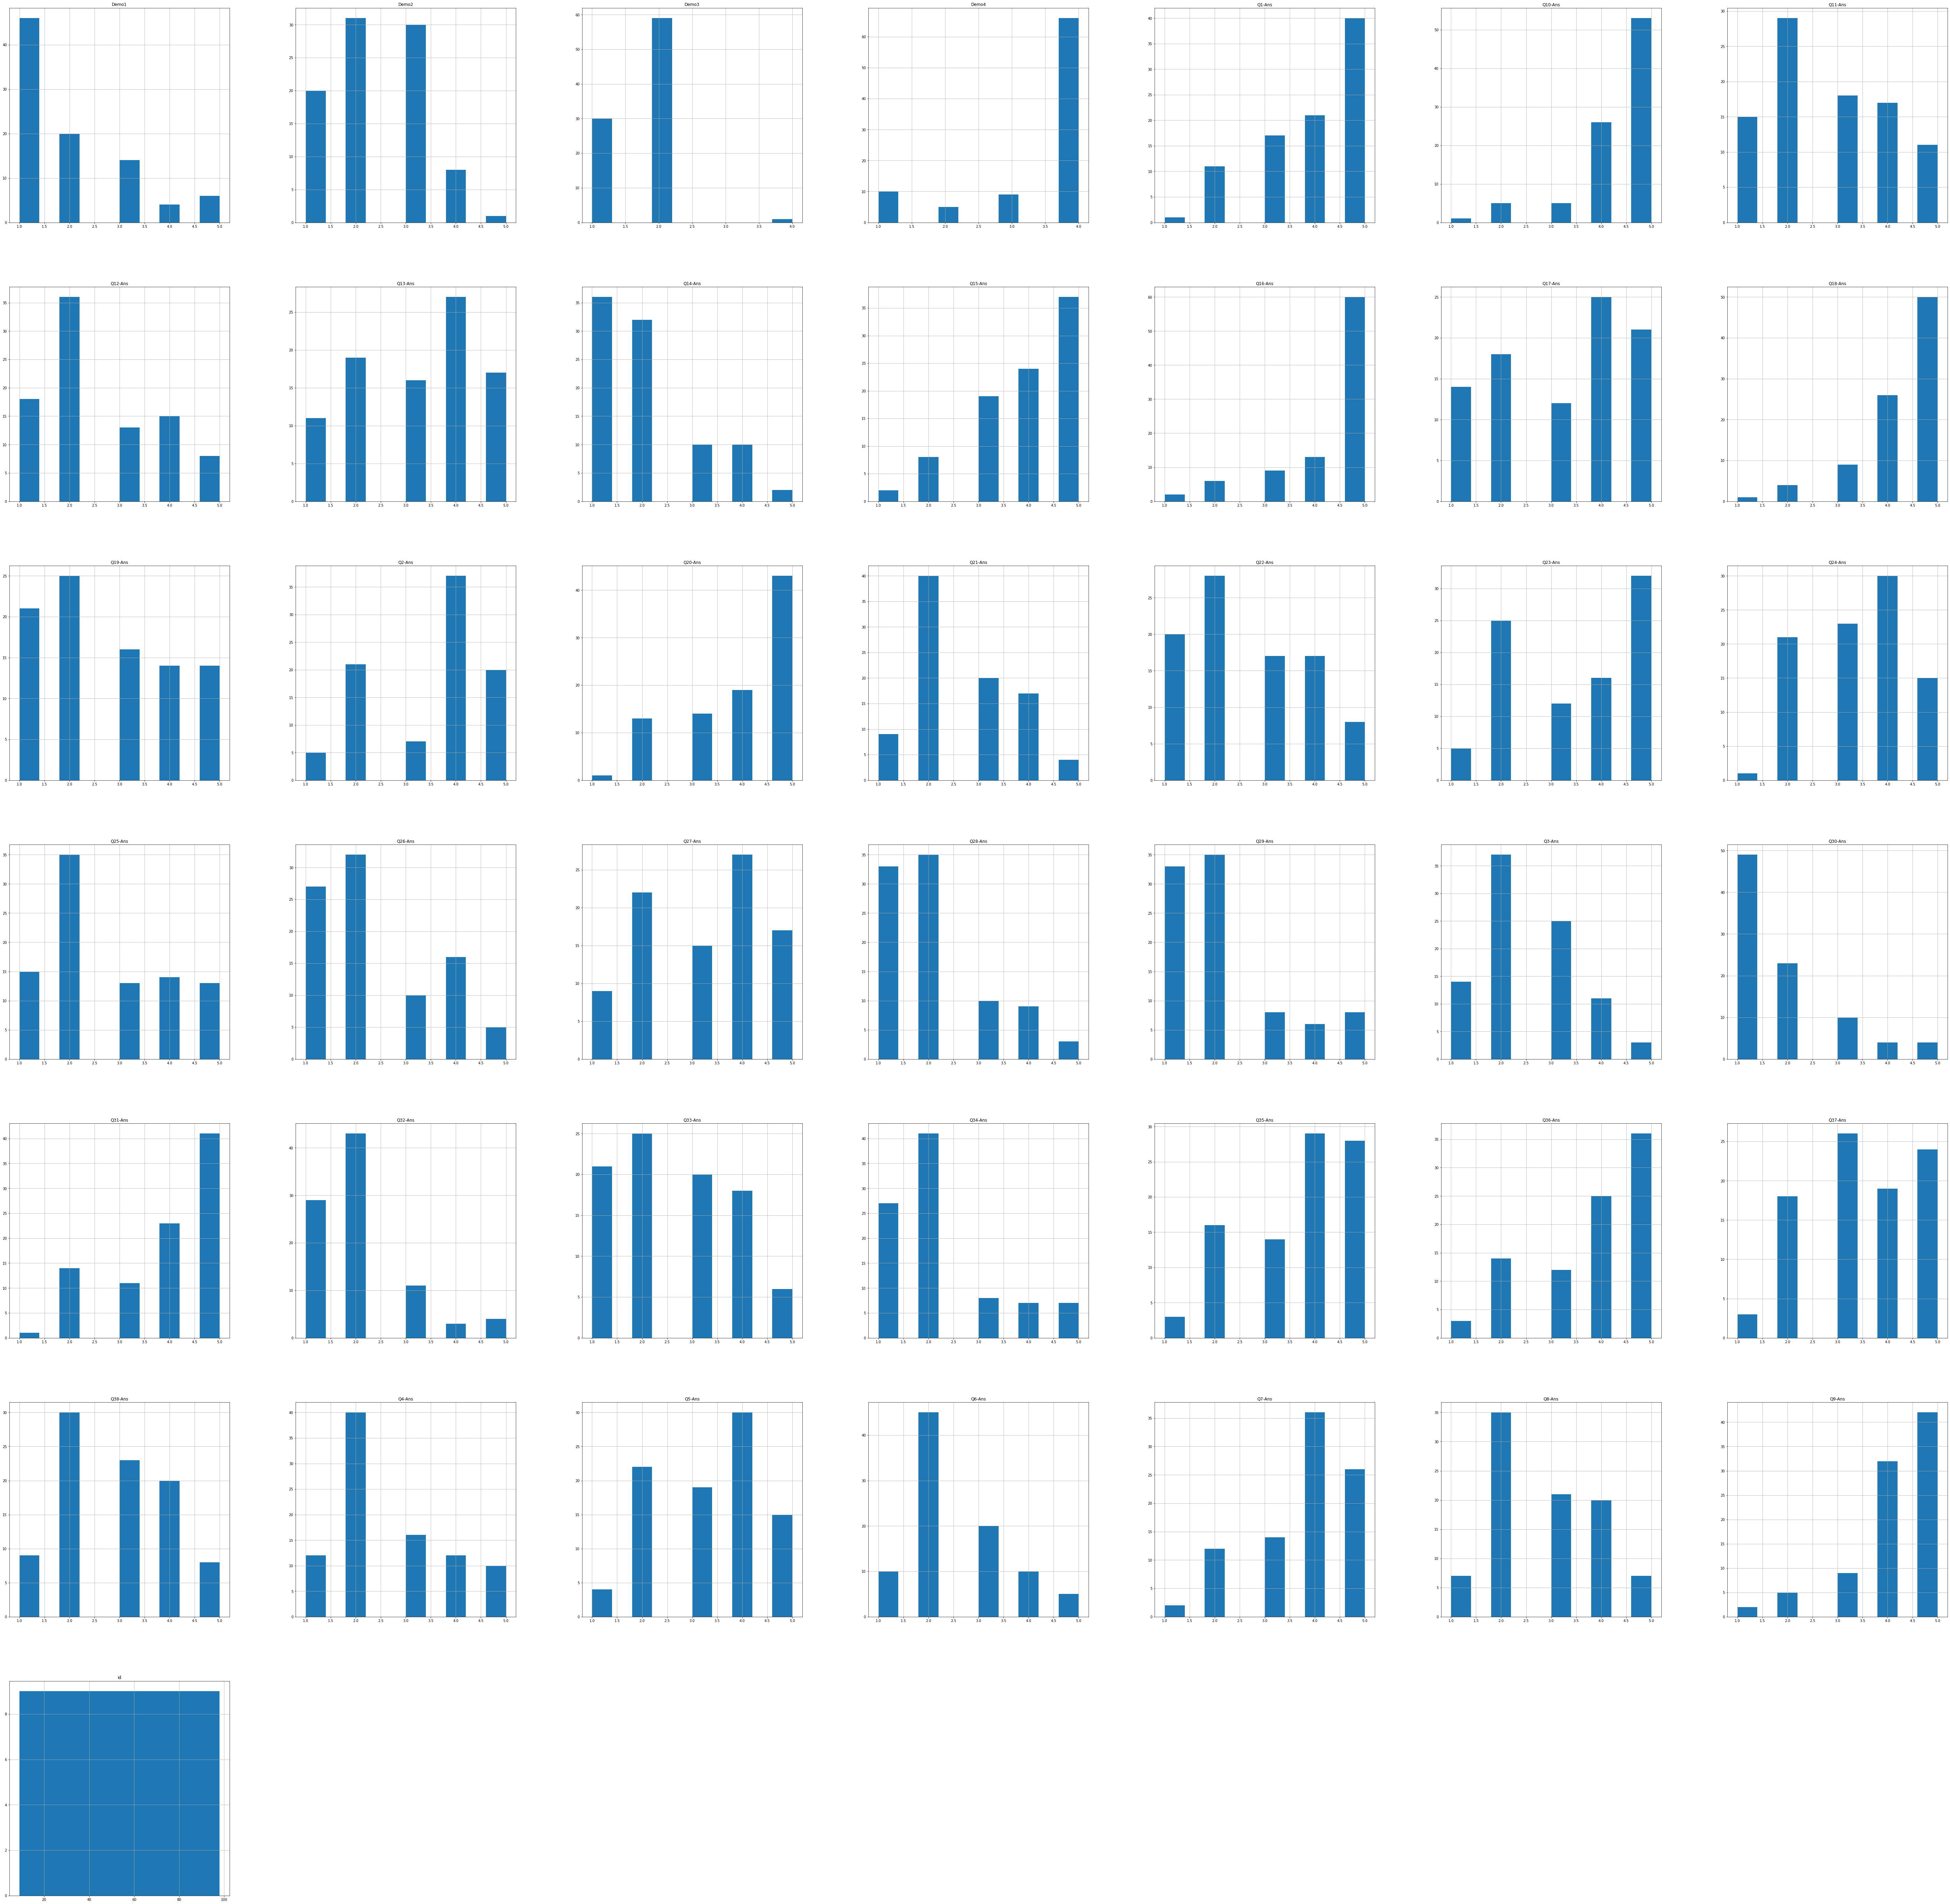

In [14]:
df_ans.hist(figsize=(100, 100))
df_ans.describe()